# 第14章聚类方法

1.聚类是针对给定的样本，依据它们属性的相似度或距离，将其归并到若干个“类”或“簇”的数据分析问题。一个类是样本的一个子集。直观上，相似的样本聚集在同类，不相似的样本分散在不同类。

2.距离或相似度度量在聚类中起着重要作用。

常用的距离度量有闵可夫斯基距离，包括欧氏距离曼哈顿距离、切比雪夫距离、、以及马哈拉诺比斯距离。常用的相似度度量有相关系数、夹角余弦。
用距离度量相似度时，距离越小表示样本越相似；用相关系数时，相关系数越大表示样本越相似。

3.类是样本的子集，比如有如下基本定义：
用$G$表示类或簇，用$x_i$,$x_j$；等表示类中的样本，用$d_{ij}$表示样本$x_i$与样本$x_j$之间的距离。如果对任意的$x _ { i } , x _ { j } \in G$，有$$d _ { i j } \leq T$$
则称$G$为一个类或簇。

描述类的特征的指标有中心、直径、散布矩阵、协方差矩阵。

4.聚类过程中用到类与类之间的距离也称为连接类与类之间的距离包括最短距离、最长距离、中心距离、平均距离。

5.层次聚类假设类别之间存在层次结构，将样本聚到层次化的类中层次聚类又有聚合或自下而上、分裂或自上而下两种方法。

聚合聚类开始将每个样本各自分到一个类；之后将相距最近的两类合并，建立一个新的类，重复此操作直到满足停止条件；得到层次化的类别。分裂聚类开始将所有样本分到一个类；之后将已有类中相距最远的样本分到两个新的类，重复此操作直到满足停止条件；得到层次化的类别。

聚合聚类需要预先确定下面三个要素：

（1）距离或相似度；
（2）合并规则；
（3）停止条件。

根据这些概念的不同组合，就可以得到不同的聚类方法。

6.$k$均值聚类是常用的聚类算法，有以下特点。基于划分的聚类方法；类别数k事先指定；以欧氏距离平方表示样本之间的距离或相似度，以中心或样本的均值表示类别；以样本和其所属类的中心之间的距离的总和为优化的目标函数；得到的类别是平坦的、非层次化的；算法是迭代算法，不能保证得到全局最优。

$k$均值聚类算法，首先选择k个类的中心，将样本分到与中心最近的类中，得到一个聚类结果；然后计算每个类的样本的均值，作为类的新的中心；重复以上步骤，直到收敛为止。

### 层次聚类 

1. **聚合**（自下而上）：聚合法开始将每个样本各自分裂到一个类，之后将相距最近的两类合并，建立一个新的类，重复次操作知道满足停止条件，得到层次化的类别。

2. **分裂**（自上而下）： 分裂法开始将所有样本分到一个类，之后将已有类中相距最远的样本分到两个新的类，重复此操作直到满足停止条件，得到层次化的类别。


### k均值聚类

k均值聚类是基于中心的聚类方法，通过迭代，将样本分到k个类中，使得每个样本与其所属类的中心或均值最近，得到k个平坦的，非层次化的类别，构成对空间的划分。

In [52]:
import math #导库
import random
import numpy as np
from sklearn import datasets,cluster
import matplotlib.pyplot as plt

In [53]:
iris = datasets.load_iris() #加载数据集

In [54]:
gt = iris['target'];gt  #提取数据集中的目标变量赋值给gt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

3类

In [55]:
iris['data'][:,:2].shape #获取数据集前两列的特征数据的形状

(150, 2)

In [56]:
data = iris['data'][:,:2] #获取前两列数据集并赋值给data

In [57]:
x = data[:,0] #x是第一列数据集
y = data[:,1] #y是第二列数据集

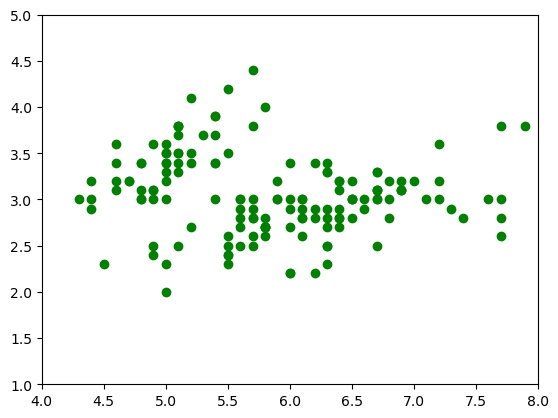

In [58]:
plt.scatter(x, y, color='green') #画图用绿色的点
plt.xlim(4, 8) #x坐标轴从4到8
plt.ylim(1, 5) #y坐标轴从1到5
plt.show() #画图

In [59]:
# 定义聚类数的节点

class ClusterNode: 
    def __init__(self, vec, left=None, right=None, distance=-1, id=None, count=1): #初始化
        """
        :param vec: 保存两个数据聚类后形成新的中心
        :param left: 左节点
        :param right:  右节点
        :param distance: 两个节点的距离
        :param id: 用来标记哪些节点是计算过的
        :param count: 这个节点的叶子节点个数
        """
        self.vec = vec
        self.left = left
        self.right = right
        self.distance = distance
        self.id = id
        self.count = count

In [60]:
def euler_distance(point1: np.ndarray, point2: list) -> float:
    """
    计算两点之间的欧拉距离，支持多维
    :param point1: 第一个点的坐标，numpy数组类型
    :param point2: 第二个点的坐标，列表类型
    :return: 两点之间的欧拉距离，浮点数类型
    """
    distance = 0.0   # 初始化距离为0
    for a, b in zip(point1, point2):   # 遍历两个点的每一个坐标
        distance += math.pow(a - b, 2)   # 计算两个坐标之间的距离，并将距离的平方加到距离distance中
    return math.sqrt(distance)   # 返回距离的平方根，即为两点之间的欧拉距离

In [61]:
# 层次聚类（聚合法）

class Hierarchical:
    def __init__(self, k): 
        self.k = k #初始化
        self.labels = None
        
    def fit(self, x):
        nodes = [ClusterNode(vec=v, id=i) for i, v in enumerate(x)] #通过传入的vec和id创建对象集合
        distances = {} #距离集合
        point_num, feature_num = x.shape #点的数量和特征的个数
        self.labels = [-1] * point_num #创建label列表，有点的个数个-1
        currentclustid = -1 #初始化簇的id为-1
        while(len(nodes)) > self.k: #迭代当节点数量大于k
            min_dist = math.inf #存储最小的距离值，math.inf表示正无穷
            nodes_len = len(nodes) #获取节点的个数 
            closest_part = None #最近的两个点初始化为空
            for i in range(nodes_len - 1): #迭代，从第一个点开始
                for j in range(i+1, nodes_len): #嵌套迭代，从当前点开始
                    d_key = (nodes[i].id, nodes[j].id) #两个节点的id组成一个元组赋值给key
                    if d_key not in distances: #如果距离集合里没有key
                        distances[d_key] = euler_distance(nodes[i].vec, nodes[j].vec) #计算欧拉距离并加入集合
                    d = distances[d_key] #距离赋值给d
                    if d < min_dist: #如果d更小
                        min_dist = d #最小值就是d
                        closest_part = (i, j) #最近的两个点
                        
            part1, part2 = closest_part #得到最近的两个点的id
            node1, node2 = nodes[part1], nodes[part2] #获取这两个节点
            new_vec = [ (node1.vec[i] * node1.count + node2.vec[i] * node2.count ) / (node1.count + node2.count)#计算两个节点的向量加权平均值
                        for i in range(feature_num)] 
            #创建一个新的聚类节点
            new_node = ClusterNode(vec=new_vec,
                                   left=node1,
                                   right=node2,
                                   distance=min_dist,
                                   id=currentclustid,
                                   count=node1.count + node2.count) #创建一个新的聚类节点，向量是new_vec,左子节点是node1,右子节点是node2，距离是min_dist，id是簇的id，两个count相加是新节点的个数
            currentclustid -= 1 #将当前聚类的id值减1
            del nodes[part2], nodes[part1] #删除nodes中的两个节点
            nodes.append(new_node) #把新节点加入节点列表
            
        self.nodes = nodes #存储到当前对象的self.nodes属性中
        self.calc_label() 
        
    def calc_label(self):
        """
        调取聚类的结果
        """
        for i, node in enumerate(self.nodes): #对节点进行遍历
            # 将节点的所有叶子节点都分类
            self.leaf_traversal(node, i)

    def leaf_traversal(self, node: ClusterNode, label):
        """
        递归遍历叶子节点
        """
        if node.left == None and node.right == None:
            self.labels[node.id] = label
        if node.left:
            self.leaf_traversal(node.left, label)
        if node.right:
            self.leaf_traversal(node.right, label)
            
# https://zhuanlan.zhihu.com/p/32438294

In [62]:
my = Hierarchical(3) #k值初始为3
my.fit(data) #拟合数据
labels = np.array(my.labels) #标签序列
print(labels) #输出

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 1 0 0 1 2 1 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


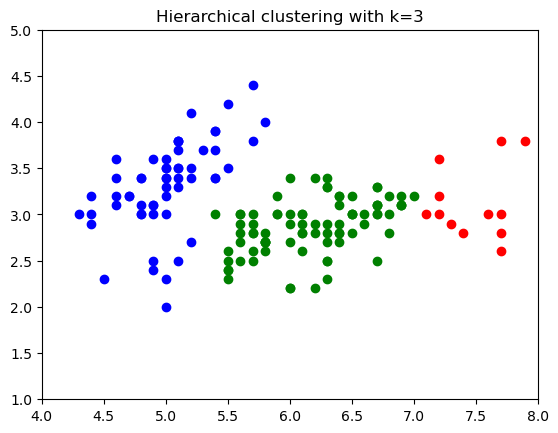

In [63]:
# visualize result

cat1 = data[np.where(labels==0)] #numpy数组中标签值为0的数据
cat2 = data[np.where(labels==1)] #1
cat3 = data[np.where(labels==2)] #2

plt.scatter(cat1[:,0], cat1[:,1], color='green') #画图
plt.scatter(cat2[:,0], cat2[:,1], color='red')
plt.scatter(cat3[:,0], cat3[:,1], color='blue')
plt.title('Hierarchical clustering with k=3') #标题
plt.xlim(4, 8) #x轴从4到8
plt.ylim(1, 5) #y轴从1到5
plt.show() #画图

In [64]:
sk = cluster.AgglomerativeClustering(3) #实例一个聚类方法
sk.fit(data) #拟合数据
labels_ = sk.labels_ #标签集合
print(labels_) #输出

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 1 0 1 1 0 2 0 2 0 2 2 2 2 0 0 2 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 1 2 2 2 0 1 2 0 2 0 0 0 0 1 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0]


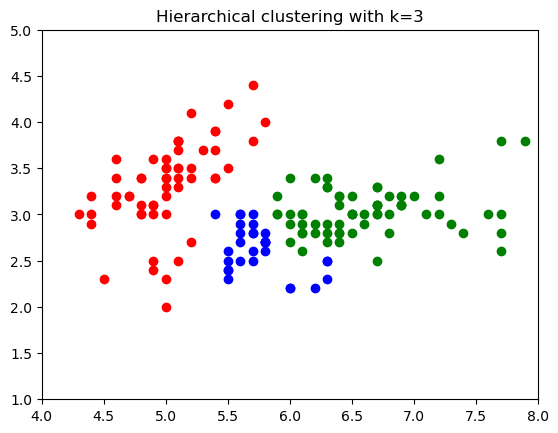

In [65]:
# visualize result of sklearn
#画图
cat1_ = data[np.where(labels_==0)]
cat2_ = data[np.where(labels_==1)]
cat3_ = data[np.where(labels_==2)]

plt.scatter(cat1_[:,0], cat1_[:,1], color='green')
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')
plt.title('Hierarchical clustering with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

---------------------------------------------------------------------------------------------------------------------------------

In [66]:
# kmeans
#k均值聚类方法
class MyKmeans:
    def __init__(self, k, n=20):
        self.k = k #初始化
        self.n = n
        
    def fit(self, x, centers=None):
        # 第一步，随机选择 K 个点, 或者指定
        if centers is None: #如果没有中心点
            idx = np.random.randint(low=0, high=len(x), size=self.k) #随机找k个点
            centers = x[idx] #作为初始中心点
        #print(centers)
        
        inters = 0
        while inters < self.n:
            #print(inters)
            #print(centers)
            points_set = {key: [] for key in range(self.k)} #存储每个聚类中心对应的点集合

            # 第二步，遍历所有点 P，将 P 放入最近的聚类中心的集合中
            for p in x: 
                nearest_index = np.argmin(np.sum((centers - p) ** 2, axis=1) ** 0.5) #计算每个点到聚类中心点的距离，并找到最近的聚类中心
                points_set[nearest_index].append(p) #将该点加入点集中

            # 第三步，遍历每一个点集，计算新的聚类中心
            for i_k in range(self.k): #计算平均值作为新的聚类中心
                centers[i_k] = sum(points_set[i_k])/len(points_set[i_k])
                
            inters += 1 #迭代次数加1

        
            
        return points_set, centers
        

In [67]:
m = MyKmeans(3) #实例一个k均值方法，k值为3
points_set, centers = m.fit(data) #赋值结果

In [68]:
centers #输出

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

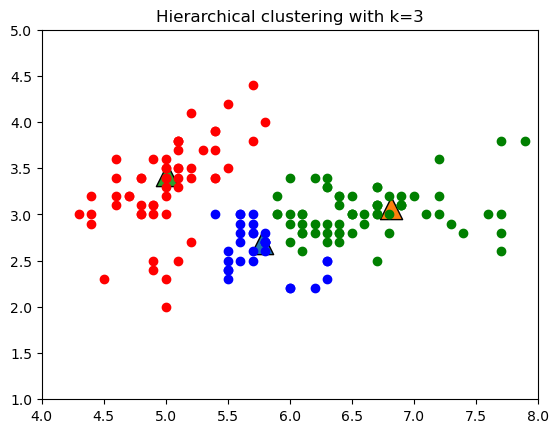

In [69]:
# visualize result
#画图
cat1 = np.asarray(points_set[0])
cat2 = np.asarray(points_set[1])
cat3 = np.asarray(points_set[2])

for ix, p in enumerate(centers):
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=256)
        
plt.scatter(cat1_[:,0], cat1_[:,1], color='green')
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')
plt.title('Hierarchical clustering with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

In [70]:
# using sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100).fit(data) #调用sklearn中的k均值方法拟合数据
gt_labels__ = kmeans.labels_
centers__ = kmeans.cluster_centers_

d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [71]:
gt_labels__

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [72]:
centers__

array([[6.81276596, 3.07446809],
       [5.77358491, 2.69245283],
       [5.006     , 3.428     ]])

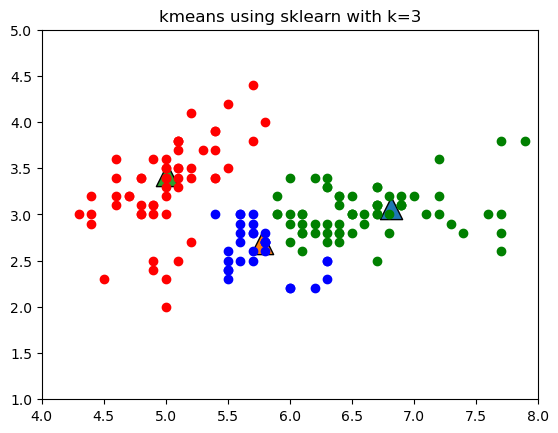

In [73]:
# visualize result
#可视化
cat1 = data[gt_labels__ == 0]
cat2 = data[gt_labels__ == 1]
cat3 = data[gt_labels__ == 2]

for ix, p in enumerate(centers__):
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=256)
        
plt.scatter(cat1_[:,0], cat1_[:,1], color='green')
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')
plt.title('kmeans using sklearn with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

#### 寻找 K 值

d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\a

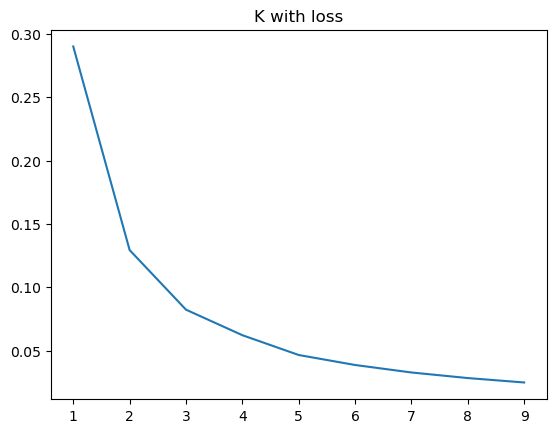

In [74]:
from sklearn.cluster import KMeans

loss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=100).fit(data)
    loss.append(kmeans.inertia_ / len(data) / 3)

plt.title('K with loss')
plt.plot(range(1, 10), loss)
plt.show()

##### 例 14.2

In [75]:
X = [[0, 2], [0, 0], [1, 0], [5, 0], [5, 2]]

In [76]:
np.asarray(X)

array([[0, 2],
       [0, 0],
       [1, 0],
       [5, 0],
       [5, 2]])

In [77]:
m = MyKmeans(2, 100)
points_set, centers = m.fit(np.asarray(X))

In [78]:
points_set

{0: [array([5, 0]), array([5, 2])],
 1: [array([0, 2]), array([0, 0]), array([1, 0])]}

In [79]:
centers

array([[5, 1],
       [0, 0]])

In [80]:
kmeans = KMeans(n_clusters=2, max_iter=100).fit(np.asarray(X))

d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [81]:
kmeans.labels_

array([1, 1, 1, 0, 0])

In [82]:
kmeans.cluster_centers_

array([[5.        , 1.        ],
       [0.33333333, 0.66666667]])

----
本章代码来源：https://github.com/hktxt/Learn-Statistical-Learning-Method

本文代码更新地址：https://github.com/fengdu78/lihang-code

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)